No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


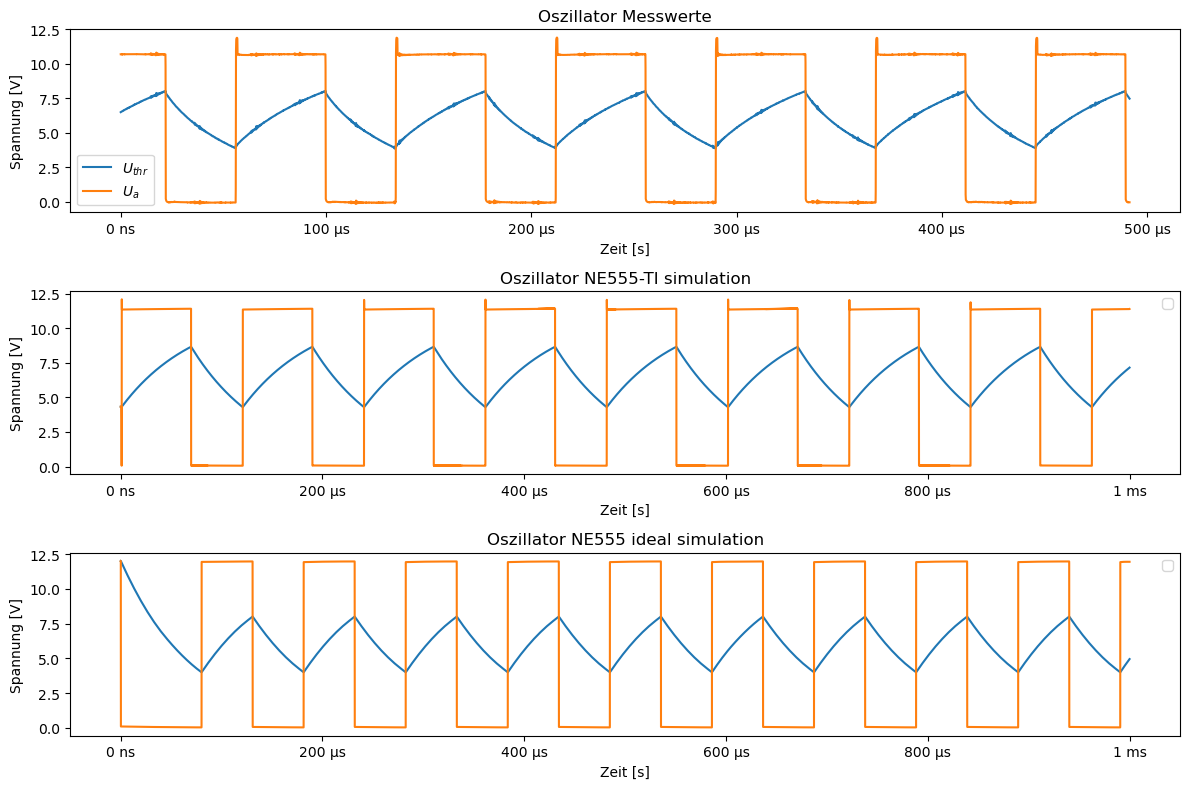

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
# Loading the data from the CSV file
df = pd.read_csv("Messwerte_Ne555_oszilator.csv", delimiter=',', comment='#',encoding = 'ISO-8859-1')
df2= pd.read_csv("simulation_ne555.csv", delimiter=';')
data = pd.read_csv("ltspice721ohm.csv", delimiter='\t')

# Helper functions for formatting labels
def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')


plt.figure(figsize=(12, 8))
plt.subplot(3, 1,1 )
plt.plot(df['Time (s)']-df['Time (s)'][0], df['Channel 1 (V)'],label="$U_{thr}$")
plt.plot(df['Time (s)']-df['Time (s)'][0], df['Channel 2 (V)'],label="$U_a$")
#plt.plot(df2['time'], df2['V(U_a)'], label='Simulation')
plt.title('Oszillator Messwerte')
plt.ylabel('Spannung [V]')
plt.xlabel('Zeit [s]')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.legend()
plt.subplot(3, 1,2)
plt.plot(df2['time'], df2['V(U_tr)'])
plt.plot(df2['time'], df2['V(U_a)'])
plt.title('Oszillator NE555-TI simulation')
plt.ylabel('Spannung [V]')
plt.xlabel('Zeit [s]')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.subplot(3, 1,3)
plt.plot(data['time'], data['V(n001)'])
plt.plot(data['time'], data['V(n002)'])
plt.title('Oszillator NE555 ideal simulation')
plt.ylabel('Spannung [V]')
plt.xlabel('Zeit [s]')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.tight_layout()
plt.savefig("oszillator.pdf")
plt.show()



[(1e-05, 40477.569659973225),
 (0.0001, 4085.2858039285657),
 (0.001, 412.3162591029748),
 (0.01, 40.29122027951348),
 (0.1, 4.066478091781858),
 (1, 0.4104180502904709),
 (10, 0.041422324724838956)]

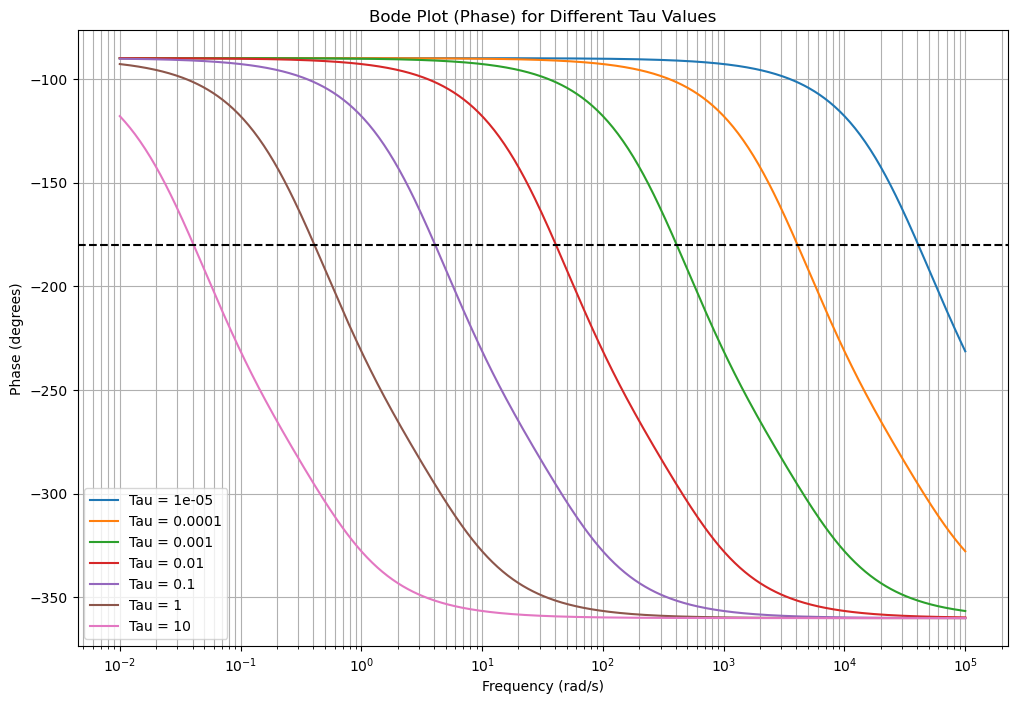

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Define the range of tau values to explore
tau_values = [0.00001,0.0001,0.001,0.01,0.1, 1, 10]  # Just a few sample values

# Frequency range for Bode plot
omega = np.logspace(-2, 5, 500)  # Covering a wide range of frequencies

plt.figure(figsize=(12, 8))

# Generate Bode plot for each tau value
for tau in tau_values:
    # Transfer function coefficients
    num = [tau**3, 0, 0, 0]
    den = [tau**3, 6*tau**2, 5*tau, 1]
    
    # Create transfer function
    sys = signal.TransferFunction(num, den)
    
    # Calculate Bode plot
    w, mag, phase = signal.bode(sys, omega)
    
    # Plot the phase plot
    plt.semilogx(w, phase, label=f'Tau = {tau}')

# Customize the plot
plt.title('Bode Plot (Phase) for Different Tau Values')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')
plt.axhline(-180, color='black', linestyle='--')  # Line at -180 degrees for reference
plt.legend()

# Show the plot
# Function to find the frequency at which the phase is closest to -180 degrees for each tau
def find_frequency_at_phase(phase, frequencies, target_phase=-180):
    # Find the index where the phase is closest to the target phase
    idx = np.argmin(np.abs(phase - target_phase))
    return frequencies[idx]

# Frequencies corresponding to -180 degrees phase for each tau
frequencies_at_180 = []

for tau in tau_values:
    # Transfer function coefficients
    num = [tau**3, 0, 0, 0]
    den = [tau**3, 6*tau**2, 5*tau, 1]
    
    # Create transfer function and calculate Bode plot
    sys = signal.TransferFunction(num, den)
    w, mag, phase = signal.bode(sys, omega)
    
    # Find the frequency at which phase is closest to -180 degrees
    freq_at_180 = find_frequency_at_phase(phase, w)
    frequencies_at_180.append(freq_at_180)

# Pairing tau values with their corresponding frequencies
tau_freq_pairs = list(zip(tau_values, frequencies_at_180))
tau_freq_pairs




In [35]:
# Define the range of tau values to explore
tau_values = [0.00001,0.0001,0.001,0.01,0.1, 1, 10]  # Just a few sample values

# Frequency range for Bode plot
omega = np.logspace(-2, 5, 500)  # Covering a wide range of frequencies
# Function to find the frequency at which the phase is closest to -180 degrees for each tau
def find_frequency_at_phase(phase, frequencies, target_phase=-180):
    # Find the index where the phase is closest to the target phase
    idx = np.argmin(np.abs(phase - target_phase))
    return frequencies[idx]

# Frequencies corresponding to -180 degrees phase for each tau
frequencies_at_180 = []

for tau in tau_values:
    # Transfer function coefficients
    num = [tau**3, 0, 0, 0]
    den = [tau**3, 6*tau**2, 5*tau, 1]
    
    # Create transfer function and calculate Bode plot
    sys = signal.TransferFunction(num, den)
    w, mag, phase = signal.bode(sys, omega)
    
    # Find the frequency at which phase is closest to -180 degrees
    freq_at_180 = find_frequency_at_phase(phase, w)
    frequencies_at_180.append(freq_at_180)

# Pairing tau values with their corresponding frequencies
tau_freq_pairs = list(zip(tau_values, frequencies_at_180))
tau_freq_pairs



[(1e-05, 40477.569659973225),
 (0.0001, 4085.2858039285657),
 (0.001, 412.3162591029748),
 (0.01, 40.29122027951348),
 (0.1, 4.066478091781858),
 (1, 0.4104180502904709),
 (10, 0.041422324724838956)]

In [36]:
56000/120

466.6666666666667